In [1]:
from skimage.transform import resize
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os

In [3]:
#rename picture file
picture = os.listdir("picture")
total = 0
for j in picture:
    scr = "picture/" + str(j)
    name = "picture/" + str(total) + ".png"
    os.rename(scr, name)
    total = total + 1

In [4]:
picture = os.listdir("picture")
picture[:10]

['0.png',
 '1.png',
 '10.png',
 '11.png',
 '12.png',
 '13.png',
 '14.png',
 '15.png',
 '16.png',
 '17.png']

In [8]:
#Create directory
""" for i in range(int(len(picture))):
    os.mkdir('charecter/charecters' + str(i))

floderj = os.listdir("charecter") """

' for i in range(int(len(picture))):\n    os.mkdir(\'charecter/charecters\' + str(i))\n\nfloderj = os.listdir("charecter") '

In [5]:
count = 0
image = []
for i in picture:
    img = cv2.imread(os.path.join('picture', i))
    orim = img.copy()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #detect edge and find contours
    imCanny = cv2.Canny(gray, 20,200)
    contours, _ = cv2.findContours(imCanny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    #first rectangle fill
    for cnt in contours:
        x,y,w,h = cv2.boundingRect(cnt)
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),-1)
    
    #second detect edge and crop image
    nimg = img
    ncanny = cv2.Canny(nimg, 20, 200)
    ncont, _ = cv2.findContours(ncanny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    floder = 'charecter/charecters' + str(count) + '/'
    no = 0
    
    for cnt in ncont:        
        #name = laChar[no]
        x,y,w,h = cv2.boundingRect(cnt)
        #cv2.rectangle(orim,(x,y),(x+w,y+h),(0,255,0),1)
        pic = orim[y:y+h,x:x+w]
        #resize image
        pic = resize(pic, (32,32))
        path = floder + "/" + str(no) + ".png"
        plt.imsave(path, pic)
        image.append(pic)
        if no > 30:
            no = 0
        no = no + 1
    count = count + 1

len(image)

1440

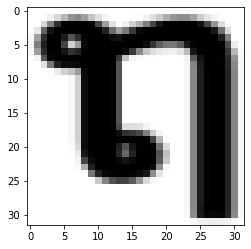

In [6]:
n = 1210
show = np.asarray(image[n])
plt.imshow(show)
plt.imsave("m.png", show)